# RandomForestClassifier
Введение
Случайный лес — это модель классификации, объединяющая некоторое количество решающих деревьев в одну композицию, за счет чего улучшается их качество работы и обобщающая способность. Деревья строятся независимо друг от друга. Чтобы они отличались друг от друга, обучение проводится не на всей обучающей выборке, а на ее случайном подмножестве. Также, для дальнейшего уменьшения схожести деревьев, оптимальный признак для разбиения выбирается не из всех возможных признаков, а лишь из их случайного подмножества. Прогнозы, выданные деревьями, объединяются в один ответ путем усреднения.

Особенность случайного леса заключается в том, что он не переобучается по мере увеличения количества деревьев в композиции. Это достигается за счет того, что деревья не зависят друг от друга, и поэтому добавление нового дерева в композицию не усложняет модель, а лишь понижает уровень шума в прогнозах.

Реализация в Scikit-Learn
В библиотеке scikit-learn случайные леса реализованы в классах sklearn.ensemble.RandomForestClassifier (для классификации) и sklearn.ensemble.RandomForestRegressor (для регрессии). Обучение модели производится с помощью функции fit, построение прогнозов — с помощью функции predict. Число деревьев задается с помощью поля класса n_estimators.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [2]:
data = pd.read_csv('abalone.csv')
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
X = data.drop('Rings',axis=1)
y = data['Rings']

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
rang = KFold(n_splits=5, shuffle=True, random_state=1)
list_score = list()
for n in range(1,51,1):
    model = RandomForestRegressor(n_estimators=n, random_state=1)
    score = cross_val_score(estimator=model, X=X, y=y, cv=rang,scoring='r2')
    list_score.append(score.mean())

Text(0,0.5,'score r2')

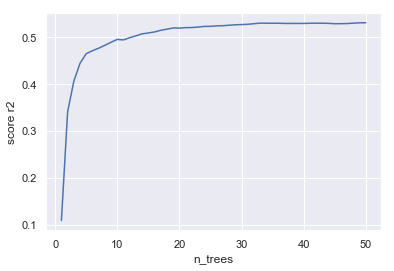

In [11]:
plt.plot(np.linspace(1,50,50), list_score)
plt.xlabel('n_trees')
plt.ylabel('score r2')

In [15]:
df_score  = pd.DataFrame(list_score)
df_score.head()

,0
0,0.109675
1,0.341300
2,0.406434
3,0.444775
4,0.465032


In [36]:
tree_min = df_score[(np.round(df_score[df_score.columns[0]],2))>0.52].index[0]+1

In [37]:
f = open('RandomForestRegressor.txt', 'w')
f.write(str(tree_min))
f.close()

In [38]:
tree_min

28